# <span style="color:blue">Desafío - Estadística descriptiva y probabilidades (parte I).</span>


## <span style="color:orange">Cargar los datos</span>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar la data 

datos=pd.read_csv('/Users/andrea/Desktop/DATA SCIENCE/Modulo 3-Python-Estadistica/Estadística descriptiva y probabilidades I/ds_salaries.csv')

# Mostrar las primeras filas del conjunto de datos

datos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## <span style="color:orange">Análisis estadístico de los salarios</span>

### <span style="color:blue">Cáculo del promedio general de los salarios, desviación estándar, quintiles y rango.</span>

Para realizar los cáculos solicitados se elige la columna *salary_in_usd* ya que convierte todos los salarios a una única moneda (USD), lo cual permite comparar los salarios de diferentes empleados de varios países sin tener que realizar ningún tipo de converisón.

Se aplican los indicadores estadísticos según corresponda al promedio general, desviación estándar y quintiles (20,40,60,80). Para el rango aplicamos la diferencia entre el valor máximo y el valor mínimo, que es una forma de describir la extensión total de los datos.


In [101]:
# Se realizan todos los cáculos en USD

# Calcular promedio general

promedio_salario = datos['salary_in_usd'].mean()

# Calcular desviación estándar

desviacion_salario = datos['salary_in_usd'].std()

# Calcular quintiles

quintiles_salario = datos['salary_in_usd'].quantile([0.2, 0.4, 0.6, 0.8])

# Calcular el rango

rango_salario = datos['salary_in_usd'].max() - datos['salary_in_usd'].min()

print(f"- El promedio general de los salarios en USD es de: {promedio_salario:.2f}\n")
print(f"- La desviación estándar de los salarios en USD es de: {desviacion_salario:.2f}\n")
print(f"- Los quintiles del salario en USD son:\n{quintiles_salario.round(2)}\n")
print(f"- El rango del salario en USD es de: {rango_salario:.2f}")

- El promedio general de los salarios en USD es de: 137570.39

- La desviación estándar de los salarios en USD es de: 63055.63

- Los quintiles del salario en USD son:
0.2     83972.8
0.4    120000.0
0.6    149850.0
0.8    185900.0
Name: salary_in_usd, dtype: float64

- El rango del salario en USD es de: 444868.00


### <span style="color:blue">Comparación de Salarios por Categorías</span>

Se seleccionan las siguientes categorías:
- **experience_level**
- **employment_type**
- **company_size**

Para cada una se realiza el cáculo de:
 - Promedio general
 - Desviación estándar
 - Mediana
 - Mínimo
 - Máximo
 - Quintiles: 20, 40, 60, 80
 
#### Explicación del código

Se hace uso de *groupby()* ya que permite aplicar múltiples funciones de agregación a diferentes columnas y personalizar fácilmente las funciones de agregación.

- **datos.groupby('columna_categoria')** -> Aca se agrupan los datos en el DataFrame **datos** por la columna de la categoría elegida. Esto significa que todas las filas con el mismo valor en la columna se agruparán juntas.

- **Aplicación de la función 'agg'** -> Usamos esta función para aplicar múltiples funciones de agregación a las columnas del DataFrame agrupado. En este caso, estamos aplicando varias funciones a la columna **salary_in_usd**.

    - Para cada función de agregación se calcula en base a los valores de **salary_in_usd** para cada grupo de la *columna_categoria*.
    
    - Para el calculo de los percentiles usamos funciones *lambda*:
        
        - **'q20','q40','q60','q80'**: Es el nombre que le damos a la nueva columna que contendrá el percentil según corresponda.
        
        - **('salary_in_usd', lambda x: x.quantile(0.2))**: Aquí se especifica cómo calcular el percentil, por ejemplo el percentil 20.*'salary_in_usd'* especifica la columna con la que estamos trabajando. Por su parte *lambda x: x.quantile(0.2)* es una función lambda que toma una serie x y calcula el percentil 20 aplicando el método **quantile** al argumento x, con 0.2 como parámetro en este caso. 
        
Finalmente mostramos el DataFrame creado recortando a 4 el número de decimales para mejorar la representación.

 

### <span style="color:blue">Elaboración de gráficas</span>

Para poder realizar una mejor interpretación de los datos se realizaron gráficas para cada una de las categorías analizadas.

#### Explicación del código

1. **Importar biblioteca**:

    - **import matplotlib.pyplot as plt**: Importa la biblioteca matplotlib para crear gráficos.

2. **Crear la Figura y los Ejes**:

    - **fig, ax = plt.subplots(figsize=(8, 3))**: Crea una figura y un conjunto de ejes para el gráfico. La figura tiene un tamaño de 8x3 pulgadas.

3. **Crear el Gráfico de Barras**:

    - **categoria['mean'].plot(...)**: Crea un gráfico de barras de las medias de los salarios.

    - **kind='bar' y color='green'**: Especifica que se trata de un gráfico de barras y establece el color de las barras en verde.

    - **yerr=categoria['std'], capsize=4**: Agrega líneas de error basadas en la desviación estándar y establece el tamaño de los topes de las líneas de error a 4.
 
4. **Agregar Títulos y Etiquetas**:

    - **ax.set_title(...)**: Agrega el título del gráfico.
    - **ax.set_xlabel(...)**: Agrega la etiqueta del eje X.
    - **ax.set_ylabel(...)**: Agrega la etiqueta del eje Y.
    - **ax.set_xticklabels(...)**: Establece las etiquetas del eje X usando los índices del DataFrame que corresponde.

5. **Ajustar el Diseño**:

    - **fig.tight_layout()**: Ajusta el diseño de la figura para evitar que las etiquetas y títulos se recorten.

6. **Mostrar el Gráfico** -> plt.show()

In [102]:
# Comparación por experience_level
    
# Agrupar por nivel de experiencia y calcular estadísticas

grupo_experiencia = datos.groupby('experience_level').agg(
    mean=('salary_in_usd', 'mean'),
    std=('salary_in_usd', 'std'),
    median=('salary_in_usd', 'median'),
    min=('salary_in_usd', 'min'),
    max=('salary_in_usd', 'max'),
    q20=('salary_in_usd', lambda x: x.quantile(0.2)),
    q40=('salary_in_usd', lambda x: x.quantile(0.4)),
    q60=('salary_in_usd', lambda x: x.quantile(0.6)),
    q80=('salary_in_usd', lambda x: x.quantile(0.8))
)

# Recortamos a 4 el número de decimales de los resultados

grupo_experiencia=grupo_experiencia.round(4)

# Mostramos el DataFrame resultante

grupo_experiencia

,mean,std,median,min,max,q20,q40,q60,q80
experience_level,,,,,,,,,
EN,78546.2844,52225.4243,70000.0,5409,300000,30000.0,58000.0,82716.8,125000.0
EX,194930.9298,70661.9297,196000.0,15000,416000,133010.4,175000.0,205000.0,244920.0
MI,104525.9391,54387.6851,100000.0,5132,450000,60688.8,85066.0,110000.0,149600.0
SE,153051.0715,56896.2640,146000.0,8000,423834,106900.0,135000.0,160000.0,198200.0


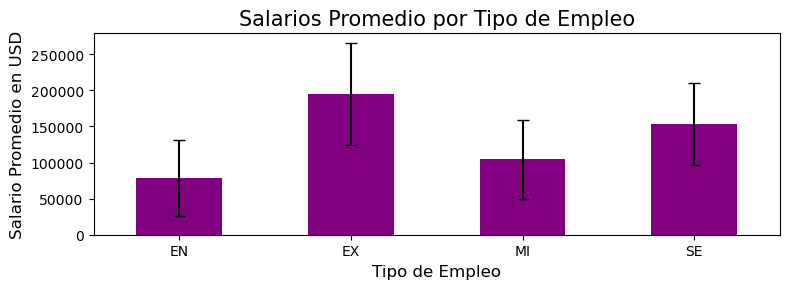

In [114]:
# Representación gráfica del DataFrame

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 3))

# Crear el gráfico de barras para la media con líneas de error para la desviación estándar

grupo_experiencia['mean'].plot(kind='bar', color='purple', yerr=grupo_experiencia['std'], capsize=4)

# Agregar títulos y etiquetas

ax.set_title('Salarios Promedio por Tipo de Empleo', fontsize=15)
ax.set_xlabel('Tipo de Empleo', fontsize=12)
ax.set_ylabel('Salario Promedio en USD', fontsize=12)
ax.set_xticklabels(grupo_experiencia.index, rotation=0)

# Ajustar el diseño para evitar recortes
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [104]:
# Comparación por employment_type

# Agrupar por tipo de empleo y calcular estadísticas

grupo_empleo = datos.groupby('employment_type').agg(
    mean=('salary_in_usd', 'mean'),
    std=('salary_in_usd', 'std'),
    median=('salary_in_usd', 'median'),
    min=('salary_in_usd', 'min'),
    max=('salary_in_usd', 'max'),
    q20=('salary_in_usd', lambda x: x.quantile(0.2)),
    q40=('salary_in_usd', lambda x: x.quantile(0.4)),
    q60=('salary_in_usd', lambda x: x.quantile(0.6)),
    q80=('salary_in_usd', lambda x: x.quantile(0.8))
)

# Recortamos a 4 el número de decimales de los resultados

grupo_empleo=grupo_empleo.round(4)

# Mostramos el DataFrame resultante

grupo_empleo


,mean,std,median,min,max,q20,q40,q60,q80
employment_type,,,,,,,,,
CT,113446.9000,130176.7468,75000.0,7500,416000,29100.0,48187.6,94000.0,138000.0
FL,51807.8000,29458.8793,50000.0,12000,100000,28418.4,48222.0,50000.0,68000.0
FT,138314.1996,62452.1776,135000.0,5132,450000,85000.0,120000.0,150000.0,185900.0
PT,39533.7059,38312.1452,21669.0,5409,125404,12000.0,18296.6,27251.8,66299.4


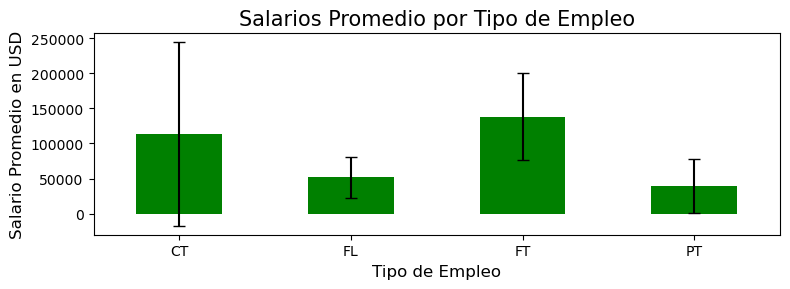

In [113]:
# Representación gráfica del DataFrame

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 3))

# Crear el gráfico de barras para la media con líneas de error para la desviación estándar
grupo_empleo['mean'].plot(kind='bar', color='green', yerr=grupo_empleo['std'], capsize=4)

# Agregar títulos y etiquetas
ax.set_title('Salarios Promedio por Tipo de Empleo', fontsize=15)
ax.set_xlabel('Tipo de Empleo', fontsize=12)
ax.set_ylabel('Salario Promedio en USD', fontsize=12)
ax.set_xticklabels(grupo_empleo.index, rotation=0)

# Ajustar el diseño para evitar recortes
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [106]:
# Comparación por company_size

# Agrupar por tamaño de la empresa y calcular estadísticas

grupo_tamano_empresa = datos.groupby('company_size').agg(
    mean=('salary_in_usd', 'mean'),
    std=('salary_in_usd', 'std'),
    median=('salary_in_usd', 'median'),
    min=('salary_in_usd', 'min'),
    max=('salary_in_usd', 'max'),
    q20=('salary_in_usd', lambda x: x.quantile(0.2)),
    q40=('salary_in_usd', lambda x: x.quantile(0.4)),
    q60=('salary_in_usd', lambda x: x.quantile(0.6)),
    q80=('salary_in_usd', lambda x: x.quantile(0.8))
)

# Recortamos a 4 el número de decimales de los resultados

grupo_tamano_empresa=grupo_tamano_empresa.round(4)

# Mostramos el DataFrame resultante

grupo_tamano_empresa


,mean,std,median,min,max,q20,q40,q60,q80
company_size,,,,,,,,,
L,118300.9824,75832.3915,108500.0,5409,423834,52221.0,89306.0,130760.0,178800.0
M,143130.5484,58992.8134,140000.0,5132,450000,95000.0,128000.0,150000.0,189650.0
S,78226.6824,61955.1418,62146.0,5679,416000,30000.0,54926.8,76833.0,115133.2


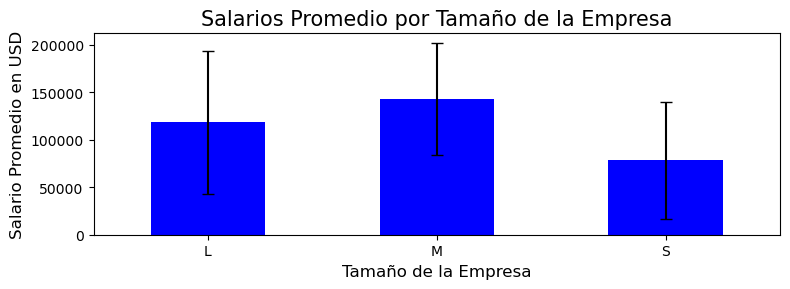

In [112]:
# Representación gráfica del DataFrame

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 3))

# Crear el gráfico de barras para la media con líneas de error para la desviación estándar
grupo_tamano_empresa['mean'].plot(kind='bar', color='blue', yerr=grupo_tamano_empresa['std'], capsize=4)

# Agregar títulos y etiquetas
ax.set_title('Salarios Promedio por Tamaño de la Empresa', fontsize=15)
ax.set_xlabel('Tamaño de la Empresa', fontsize=12)
ax.set_ylabel('Salario Promedio en USD', fontsize=12)
ax.set_xticklabels(grupo_tamano_empresa.index, rotation=0)

# Ajustar el diseño para evitar recortes
fig.tight_layout()

# Mostrar el gráfico
plt.show()

## <span style="color:orange">Interpretación de los indicadores estadísticos</span>

#### ¿Para cuál de ellas las medidas de tendencia central son más representativas? ¿Para cuál son menos representativas?

Para determinar qué categorías tienen medidas de tendencia central más representativas, analizamos la relación entre la media y la mediana, así como la desviación estándar y los quintiles. Según los datos obtenidos se puede interpretar lo siguiente:

- **Comparación por Nivel de Experiencia (experience_level)**

    - **EN (nivel de entrada / junior)**: La diferencia entre la media y la mediana es elevada, y la desviación estándar es alta, esto nos indica una alta variabilidad en los salarios. Las medidas de tendencia central son menos representativas porque la dispersión de los datos es alta.

    - **EX (nivel ejecutivo / director)**: La media y la mediana tienen valores bastante cercanos. Se visualiza que la desviación estándar es alta. Pese a esto, la proximidad de la media y la mediana sugiere que las medidas de tendencia central son representativas para este grupo.

    - **MI (nivel medio / intermedio)**: La diferencia entre la media y la mediana es moderada, y la desviación estándar es significativa, indicando una variabilidad considerable. Las medidas de tendencia central son relativamente representativas, pero hay dispersión.

    - **SE (nivel senior / experto)**: La diferencia entre la media y la mediana es pequeña, y la desviación estándar es alta. Las medidas de tendencia central son bastante representativas debido a la cercanía de la media y la mediana.

- **Comparación por Tipo de Empleo (employment_type)**

    - **CT (contrato)**: La diferencia entre la media y la mediana es alta. La desviación estándar es muy alta. Las medidas de tendencia central son menos representativas debido a la dispersión.

    - **FL (freelance)**: La media y la mediana son cercanas, y la desviación estándar es baja. Las medidas de tendencia central son representativas para este grupo.

    - **FT (tiempo completo)**: La diferencia entre la media y la mediana es pequeña. Por su parte la desviación estándar es alta. Las medidas de tendencia central son bastante representativas debido a la cercanía de la media y la mediana.

    - **PT (tiempo parcial)**: La diferencia entre la media y la mediana es alta, y la desviación estándar también es alta. Las medidas de tendencia central son menos representativas debido a la dispersión elevada.


- **Comparación por Tamaño de la Empresa (company_size)**

    - **L (grande)**: La diferencia entre la media y la mediana es moderada, pero la desviación estándar es alta. Las medidas de tendencia central son relativamente representativas.

    - **M (mediana)**: La pequeña diferencia entre la media y la mediana y la alta desviación estándar sugieren que las medidas de tendencia central son representativas.

    - **S (pequeña)**: La diferencia entre la media y la mediana es alta y la desviación estándar es alta también, por lo que se sugiere que las medidas de tendencia central son menos representativas debido a la dispersión elevada.


##### Conclusiones

**Más representativas**:

- **Nivel de Experiencia** -> *EX (ejecutivo / director)*: La cercanía entre la media y la mediana, junto con la alta desviación estándar, sugiere que las medidas de tendencia central son bastante representativas.

- **Tipo de Empleo** -> *FL (freelance)*: La proximidad entre la media y la mediana y la baja desviación estándar indican que las medidas de tendencia central son representativas.

- **Tamaño de Empresa** -> *M (mediana)*: La pequeña diferencia entre la media y la mediana y la alta desviación estándar sugieren que las medidas de tendencia central son representativas.


**Menos representativas**:

- **Nivel de Experiencia** -> *EN (nivel de entrada / junior)*: La alta variabilidad y la diferencia entre la media y la mediana indican que las medidas de tendencia central son menos representativas.

- **Tipo de Empleo** -> *CT (contrato)*: La gran diferencia entre la media y la mediana y la muy alta desviación estándar indican que las medidas de tendencia central son menos representativas.

- **Tamaño de Empresa** -> *S (pequeña)*: La alta diferencia entre la media y la mediana y la alta desviación estándar sugieren que las medidas de tendencia central son menos representativas.


## <span style="color:orange">Cargos con mejores sueldos en empresas con sede en Estados Unidos</span>

Primero debemos filtrar los datos en base a las empresas que se encuentran en Estados Unidos, para elos usamos la columna **'company_location'** y establecemos la igualdad al valor **'US'**.

Posteriormente se agrupan los datos filtrados en *empresas_usa* por **job_title** y calculamos el promedio de **salary_in_usd**. 

Con **sort_values(by='mean', ascending=False)** ordenamos los resultados por el valor promedio en orden descendente usando la propiedad **ascending=False** para mostrar primero los cargos con los salarios más altos.

In [115]:
# Filtrar datos para empresas en Estados Unidos

empresas_usa = datos[datos['company_location'] == 'US']

# Agrupar por puesto de trabajo y calcular el promedio de los salarios

grupo_puesto_usa = empresas_usa.groupby('job_title').agg(mean=('salary_in_usd', 'mean')
                                                        ).sort_values(by='mean', ascending=False)

# Acortar el numero de decimales a 4

grupo_puesto_usa = grupo_puesto_usa.round(4)

# Mostrar el DataFrame

grupo_puesto_usa


,mean
job_title,
Data Analytics Lead,405000.0000
Data Science Tech Lead,375000.0000
Director of Data Science,294375.0000
Principal Data Scientist,255500.0000
Cloud Data Architect,250000.0000
...,...
Data Quality Analyst,82863.3333
BI Data Analyst,82709.8333
Data Analytics Consultant,81500.0000


### <span style="color:blue">Representación gráfica de los sueldos para empresas con sede en Estados Unidos</span>

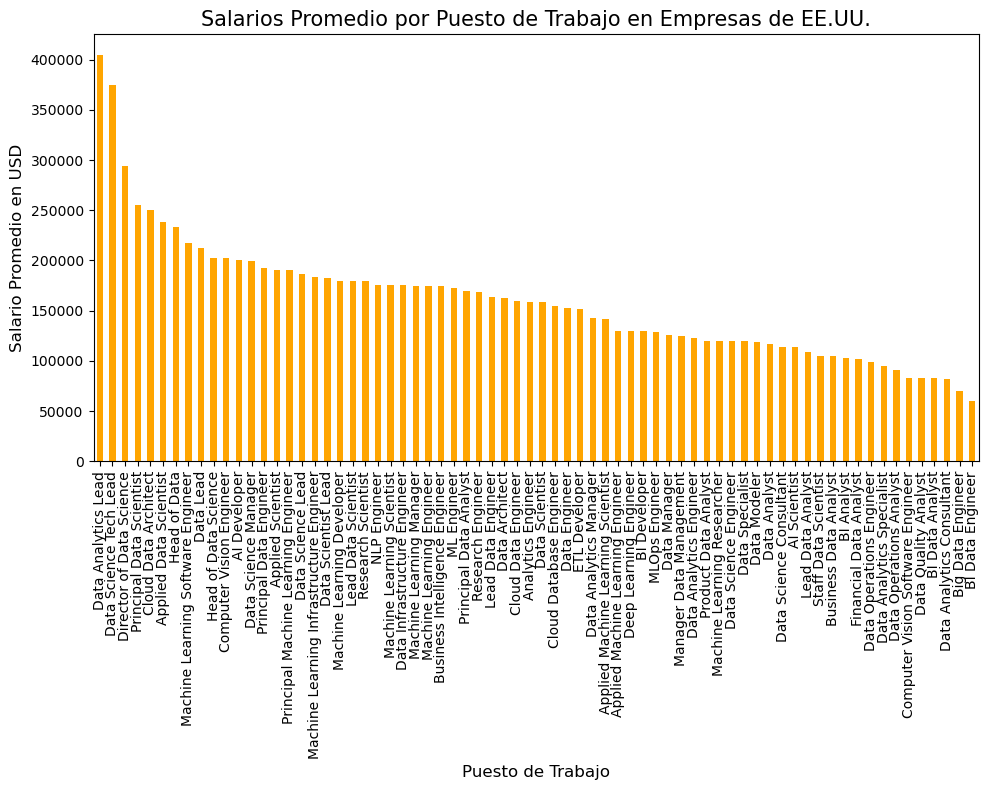

In [69]:
# Crear la figura y los ejes

fig, ax = plt.subplots(figsize=(10, 8))

# Crear el gráfico de barras

grupo_puesto_usa['mean'].plot(kind='bar', color='orange')

# Agregar títulos y etiquetas
ax.set_title('Salarios Promedio por Puesto de Trabajo en Empresas de EE.UU.', fontsize=15)
ax.set_xlabel('Puesto de Trabajo', fontsize=12)
ax.set_ylabel('Salario Promedio en USD', fontsize=12)
ax.set_xticklabels(grupo_puesto_usa.index, rotation=90)

# Ajustar el diseño para evitar recortes
fig.tight_layout()

# Mostrar el gráfico
plt.show()